## https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code

## what is used: OrdinalEncoder, mean_squared_error, model.score(x_test,y_test)
## train[num_columns].corrwith(train['SalePrice'])
## train[num_columns].corr()
### one hot encoder learned

# linear model

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # chart manipulation
import matplotlib.pyplot as plt # chart manipulation


# data processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# ml model and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

  
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
        
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/tmp/ipykernel_32368/3992807543.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
path = "data/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
submission = pd.read_csv(path + 'sample_submission.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
def table_info(df):
    
    def classified(x):
        if x == 'int64':
            return 'int'
        elif x == 'object':
            return 'str'
        else:
            return 'float'
        
    df_col = df.columns # get column name
    new_df = df.dtypes # get datatype
    total_row = df.shape[0] # get total row
    new_df.index.name = 'Columns'
    
    new_df = new_df.to_frame(name='Pandas_dtype') # create new dataframe from the pandas.dtype dataframe
    new_df['Python_type'] = new_df['Pandas_dtype'].apply(classified) # add python type
    new_df["Total_Unique"] = df.nunique()
    new_df['Missing_Value'] = df.isnull().sum()  # add missing value col
    new_df['% Missing_Values'] = round((new_df['Missing_Value'] / total_row) * 100,2) # add % missing val
    
    
    print('------------ DATA SUMMARY ----------')
    print(f'\nTotal Rows   : {total_row}')
    print(f'Total Columns: {df.shape[1]}')
    
    val = df.duplicated().value_counts()
    print(f'\nTotal Duplicates: {len(df) - val[0]} \n')
    print('------------------------------------')
    print()
        
    
    return new_df

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# In this cleaning process,
# 1. categorical column will be fill with 'Not Avaialable' value
# 2. numerical column will be fill with 0
# 3. 'Electrical' column will be fill with mode value


# steps

# - get all the missing column
train_info = train.isna().sum().reset_index().rename(columns={0:'total missing'})
column_missing = list(train_info[train_info['total missing'] > 0]['index'])


In [9]:
train_info[train_info["total missing"]>0]

,index,total missing
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,872
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [10]:
### The mode is the value that appears most often. There can be multiple modes.

train["Electrical"].mode()

0    SBrkr
Name: Electrical, dtype: object

In [11]:
# - loop for each missing column, if it 'object' type then it will replace with 'Not Available', float type will be replaced with '0', while 'electrical' missing value will be replace by mode
for column in column_missing:
    if column == 'Electrical':
        #print('t')
        train[column] = train[column].fillna(train[column].mode()[0])
    elif train[column].dtype == 'object':
        train[column] = train[column].fillna('Not Available')
    else:
        train[column] = train[column].fillna(0)


In [12]:
# - recheck back if the missing value has been fixed
table_info(train)

------------ DATA SUMMARY ----------

Total Rows   : 1460
Total Columns: 81

Total Duplicates: 0 

------------------------------------



/tmp/ipykernel_32368/3245060030.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'\nTotal Duplicates: {len(df) - val[0]} \n')


,Pandas_dtype,Python_type,Total_Unique,Missing_Value,% Missing_Values
Columns,,,,,
Id,int64,int,1460,0,0.0
MSSubClass,int64,int,15,0,0.0
MSZoning,object,str,5,0,0.0
LotFrontage,float64,float,111,0,0.0
LotArea,int64,int,1073,0,0.0
Street,object,str,2,0,0.0
Alley,object,str,3,0,0.0
LotShape,object,str,4,0,0.0
LandContour,object,str,4,0,0.0


## data understanding

In [13]:
# Split into continuous and numerical data

cat_columns = [column for column in train.columns if train[column].dtype == 'object']
num_columns = [column for column in train.columns if train[column].dtype != 'object']

print(f'Total Categorical columns : {len(cat_columns)}')
print(f'Total Numerical columns   : {len(num_columns)}')

Total Categorical columns : 43
Total Numerical columns   : 38


In [14]:
# Top 10 highest correlation with Saleprice

# Calculate correlations with the specified column
correlations = train[num_columns].corrwith(train['SalePrice'])

# Get the absolute values and sort in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Get the top 10 correlations
top_10_correlations_top = sorted_correlations.head(11)

# Display the result
print(top_10_correlations_top)
print('')

Columns
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64



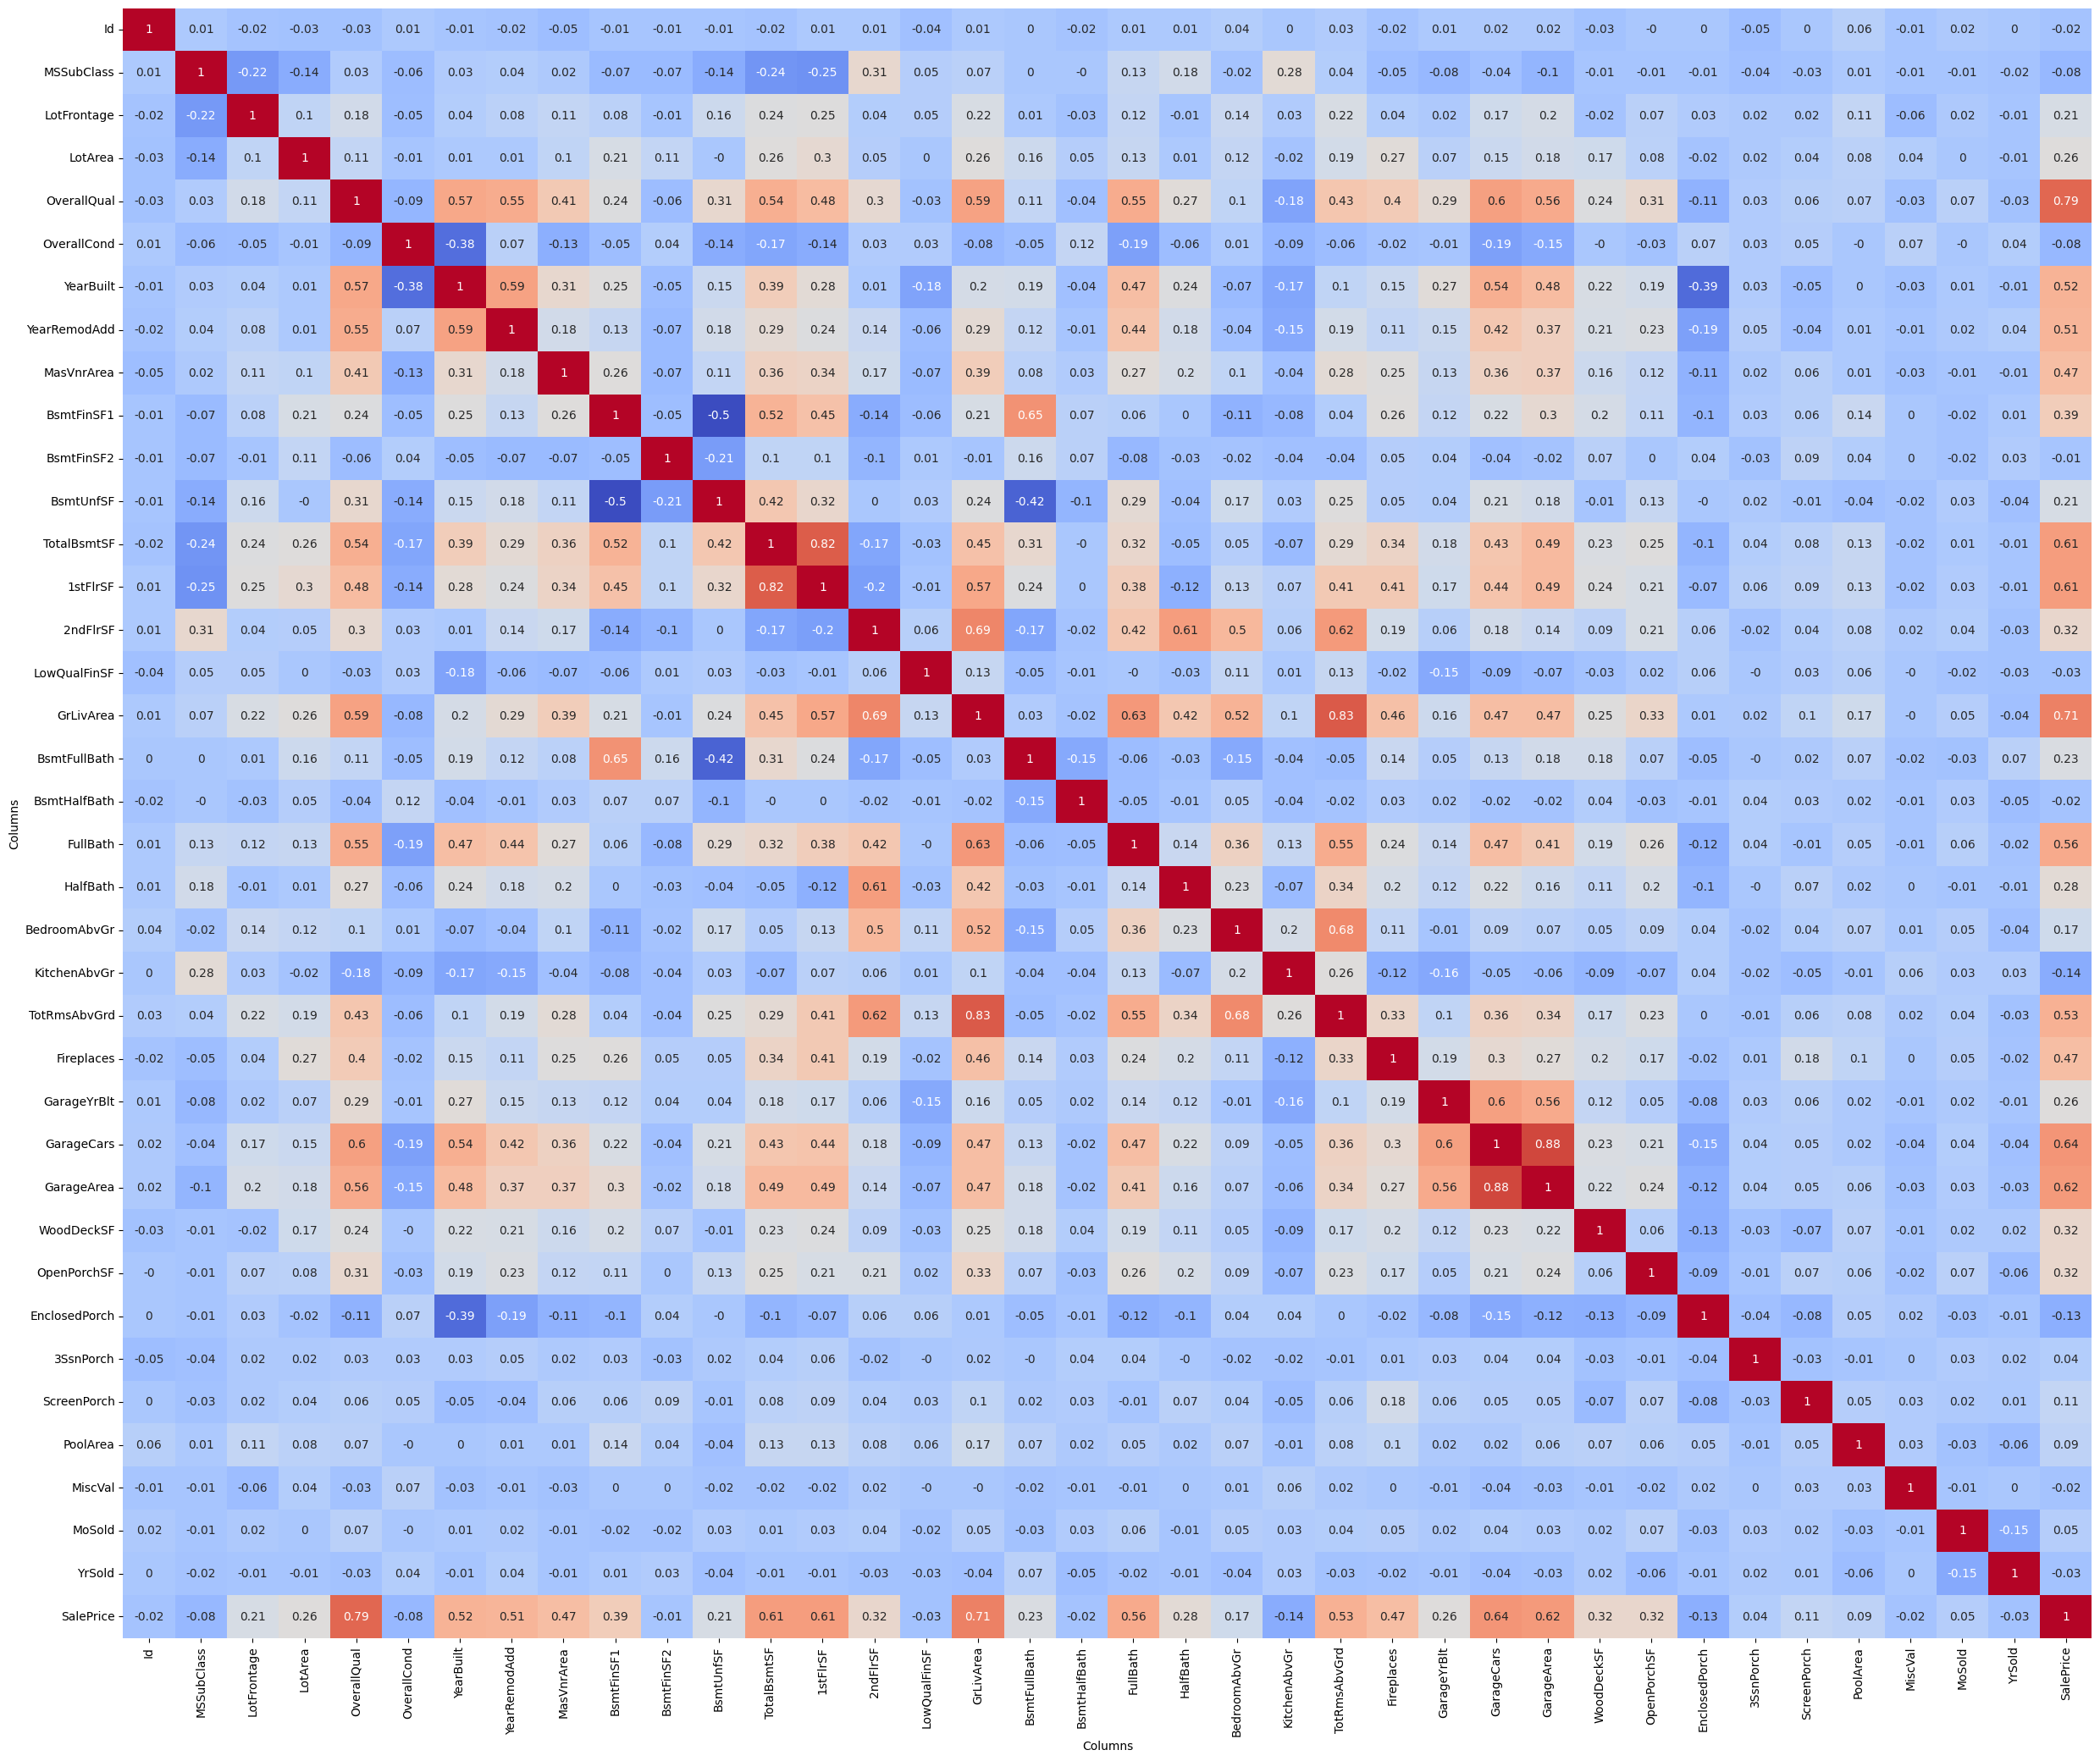

In [15]:
# Is there exist any multicollinearity?

# check the relations value for each numerical columns
plt.figure(figsize=(30,25))
sns.heatmap(data=train[num_columns].corr().round(2), annot=True, cbar=False, cmap='coolwarm') 
plt.show()

### Investigate the distribution of each numerical columns with Sale Price column


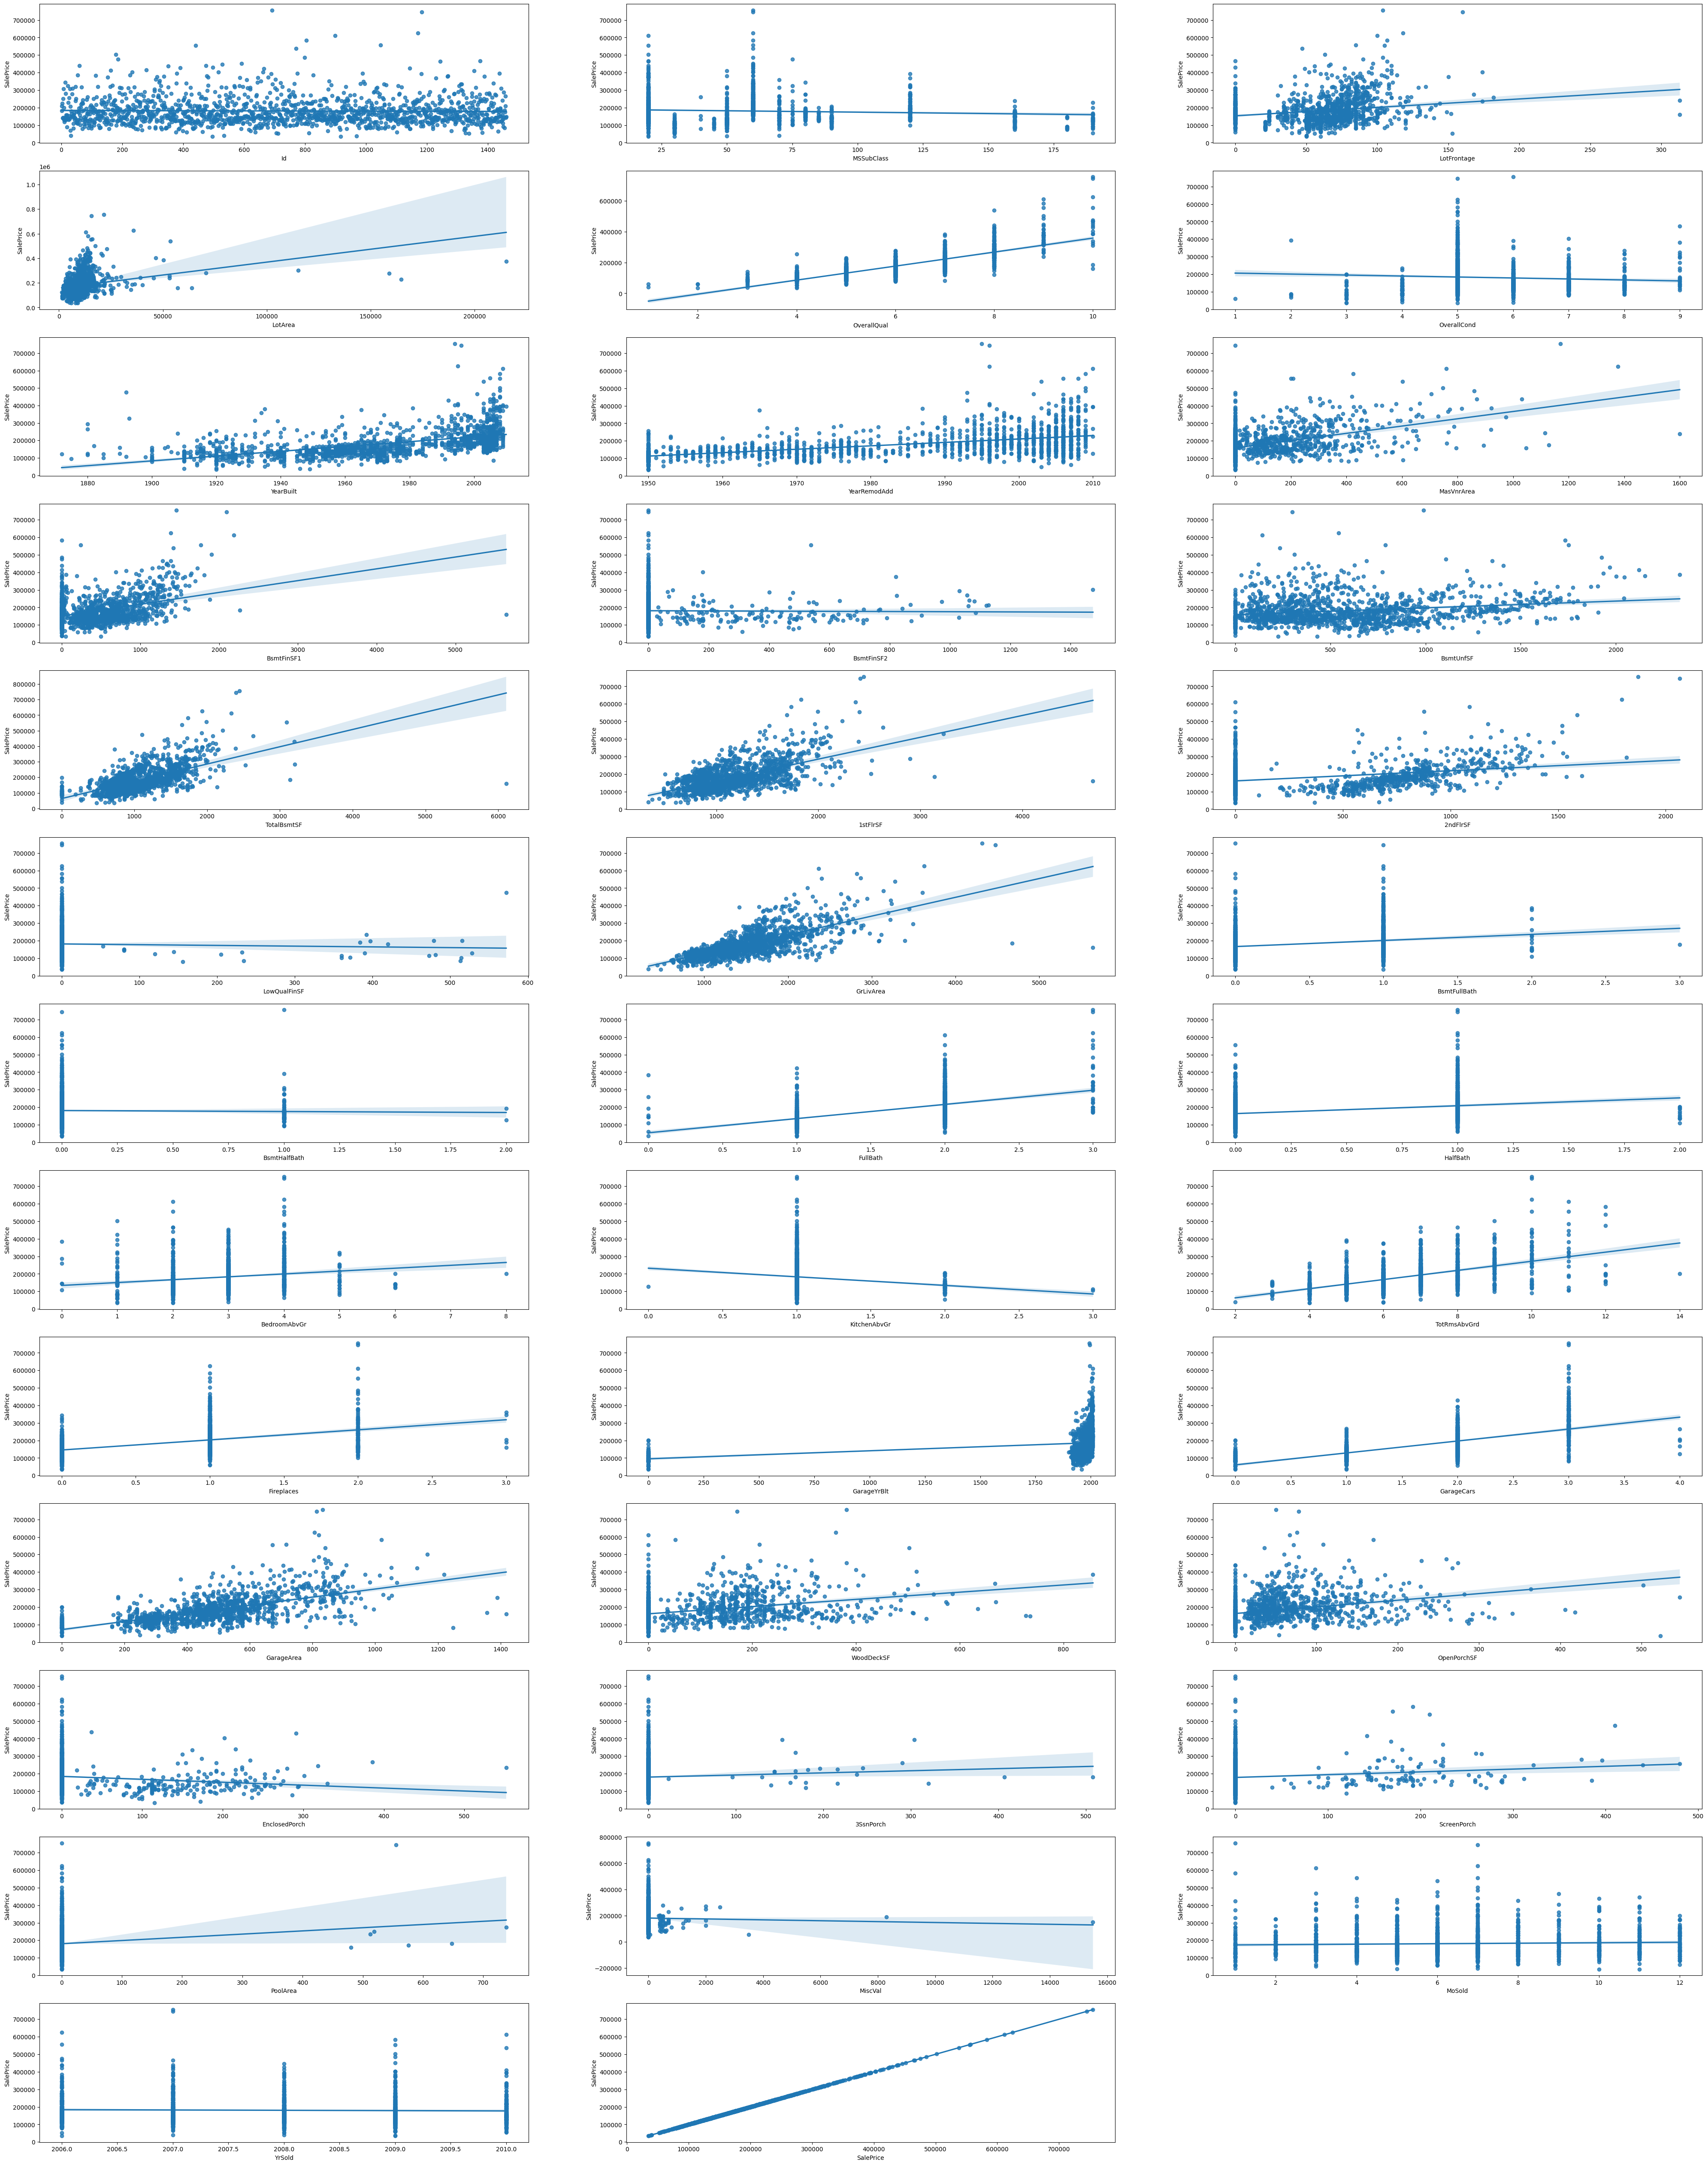

In [16]:


plt.figure(figsize = (50,100))
for i in enumerate(num_columns):
    plt.subplot(20,3, i[0] + 1)
    sns.regplot(data = train, x=i[1], y='SalePrice')

### Categorical Columns¶


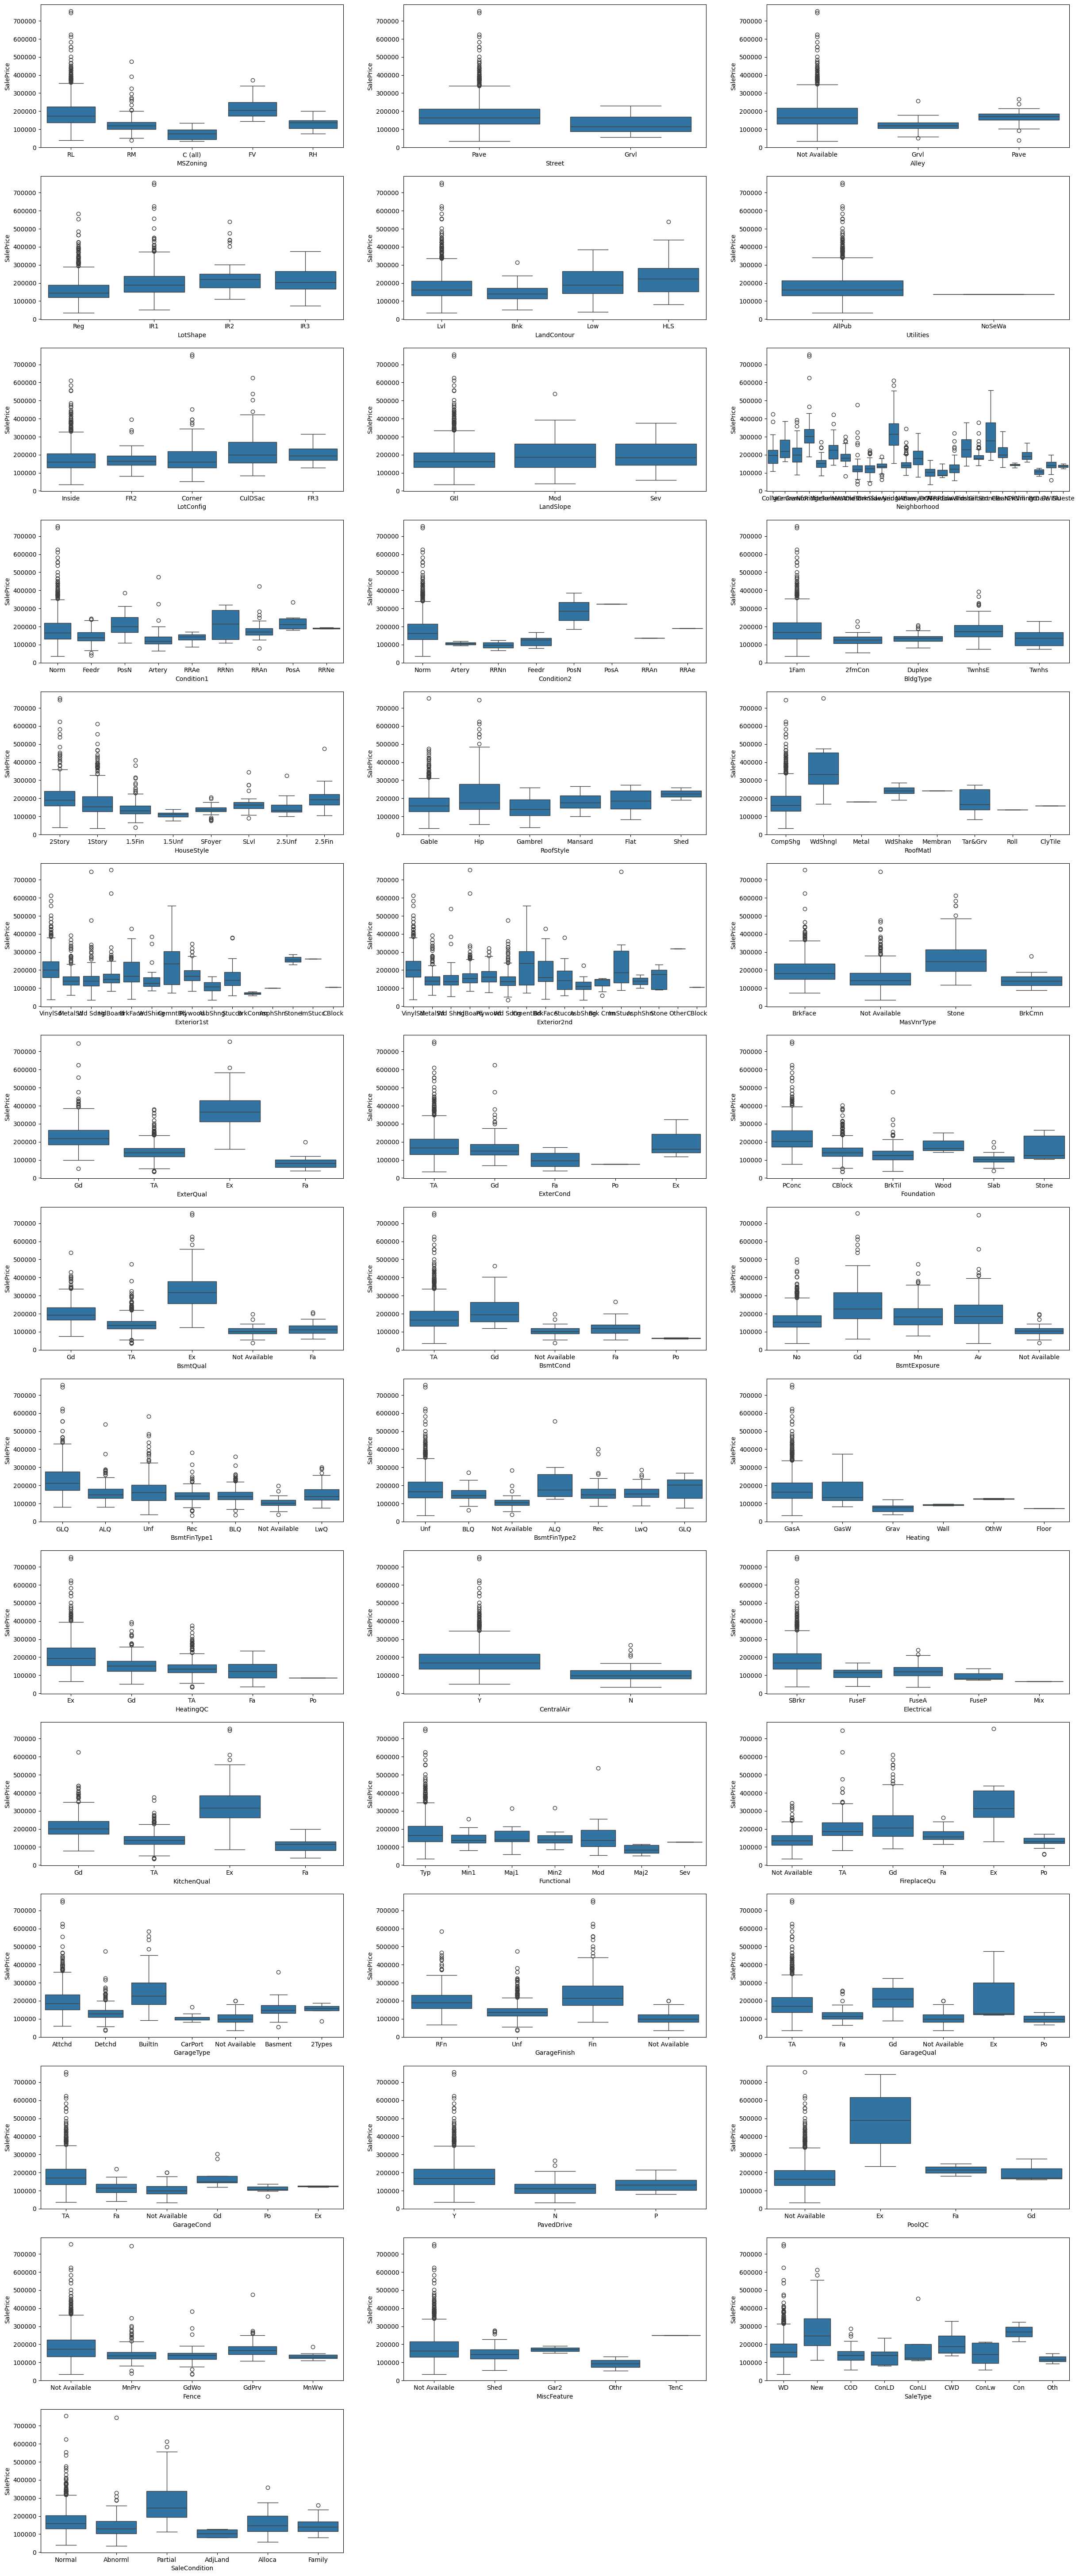

In [17]:
# Investigae the distribution of each categorical feature with Sale Price


plt.figure(figsize = (30,100))
for i in enumerate(cat_columns):
    plt.subplot(20,3, i[0] + 1)
    sns.boxplot(data=train, x= i[1], y="SalePrice")

In [18]:
train.drop(columns = ['Id'], inplace=True)

## one hot encoding (only for learning purpose, will not apply)

In [21]:
train["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

### 1. use pd.get_dummies: this will remove the selected columns and replace it with a couple of new columns

In [23]:
pd.get_dummies(train, columns = ['MSZoning']).head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500,False,False,False,True,False
1,20,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Not Available,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500,False,False,False,True,False
2,60,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500,False,False,False,True,False
3,70,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Not Available,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000,False,False,False,True,False
4,60,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000,False,False,False,True,False


### 2. use OneHotEncoder from sklearn

In [24]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

In [29]:
### fit_transform will create a sparse matrix, convert it to array with toarray(), then transfer it to dataframe
enc_df= pd.DataFrame(enc.fit_transform(train[['MSZoning']]).toarray())
train_df_new=train.join(enc_df)

In [30]:
train_df_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,0,1,2,3,4
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Not Available,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Not Available,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0


## OrdinalEncoder vs LabelEncoder
## both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

## That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,)
## (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)

In [18]:
# 2. convert all the categorical into numerical feature
# using the ordinal encoder just to make it easier and also not to make the dataset dimension big


encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# fit the categorical data
encoder.fit(train[cat_columns])

# transform the cat columns
train[cat_columns] = encoder.transform(train[cat_columns])

In [19]:
X = train.copy().drop(columns = 'SalePrice')
y = train[['SalePrice']].copy()

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,
                                    shuffle=True) 


print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')


X_train: (1095, 79)
y_train: (1095, 1)
X_test: (365, 79)
y_test: (365, 1)


In [20]:
# 4. use standard scalar to standardize all the values

# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X)


# scale the val
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### score()?
## model.score(X,y) calculation is based on co-efficient of determination i.e R^2 that takes model.score= (X_test,y_test). 
## The y_predicted need not be supplied externally, rather it calculates y_predicted internally and uses it in the calculations.

## This is how scikit-learn calculates model.score(X_test,y_test):

## u = ((y_test - y_predicted) ** 2).sum()

## v = ((y_test - y_test.mean()) ** 2).sum()

## score = 1 - (u/v)

In [21]:
# Built a linear regression model for this exercise

# define model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# get the score based on the test dataset
model_score = model.score(X_test, y_test)

# doing the prediction on the x, y test dataset
y_pred = model.predict(X_test)

# show the model mse score
mse = mean_squared_error(y_test, y_pred)


print(f'Model Score {model_score}')
print(f'Model MSE Score {mse}')

Model Score 0.8584117284953039
Model MSE Score 989199046.2708486


# RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print(mse2)


/home/bguo/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


856530549.9266739


### Test data: Data Cleaning & Preparation¶


In [22]:
## 
# 1. clean up all the missing value

test_info = test.isna().sum().reset_index().rename(columns={0:'total missing'})
column_missing = list(test_info[test_info['total missing'] > 0]['index'])


# loop for each missing column, if it 'object' type then it will replace with 'Not Available', float is '0', while 'electrical' missing value will be replace by mode
for column in column_missing:
    if column == 'Electrical':
        #print('t')
        test[column] = test[column].fillna(test[column].mode()[0])
    elif test[column].dtype == 'object':
        test[column] = test[column].fillna('Not Available')
    else:
        test[column] = test[column].fillna(0)
        

# 2. drop the id column
test.drop(columns='Id', inplace=True)

# 3. convert all the categorical into numerical feature
test[cat_columns] = encoder.transform(test[cat_columns])

# 4. apply standardization
test = scaler.transform(test)

In [23]:
y_test_pred = model.predict(test)